# 3.5 Visualisation

Visualisation is an important component to help us to analyse and understand the data. In this section we will go through the visualisation functions provided by `pandas`. First we will explore them using `Jupyter` notebook before we address additional considerations when performing visualisation using `Python` script or `terminal`. 

The `pandas` library provides numerous visualisation functions to visualise the data in a `DataFrame` and a `Series`. These visualisation functions are essentially wrapper for the functions and tools provided by `Matplotlib`, a powerful `Python` visualisation library. Therefore we will first explore the functions provided in pandas before going a bit further using `Matplotlib` library.

For this particular section to explore the visualisation function, we will be demonstrating using `Jupyter` notebook. `Jupyter` notebook allows text, code, and code outputs (text and images) being displayed inline.

<ins>**Visualisation using pandas**</ins>

First, click the top left button to reveal the directory structure of the workspace. The content for visualisation using `pandas` is in `pandas.ipynb`. `.ipynb` is a standard extension for `Jupyter` notebook (which was called `IPython` notebook previously). Double click the file to open it in the workspace. Follow the instructions, explanations, and demonstrations in the `Jupyter` notebook to learn about using the visualisation functions in `pandas`.

For most data, the most intuitive way of understanding the pattern of the data is by visualisation. The purpose of visualisation is to allow us to view the data and understand the relationships and patterns within the data.

To start, we have a set of entry data for a car park for one month. The data is saved in `carpartentry.csv` with three columns, day of month (`dom`), day of week (`dow`), and number of entry (`ent`).

In [11]:
import pandas as pd
df = pd.read_csv("../datasets/carparkentry.csv")
df.head()

,dom,dow,ent
0,1,Sun,594
1,2,Mon,554
2,3,Tue,301
3,4,Wed,222
4,5,Thu,70


<ins>Line Graph</ins>

Let's start with a line graph to show how the entry data is from the beginning till the end of the month.


<Axes: xlabel='dom'>

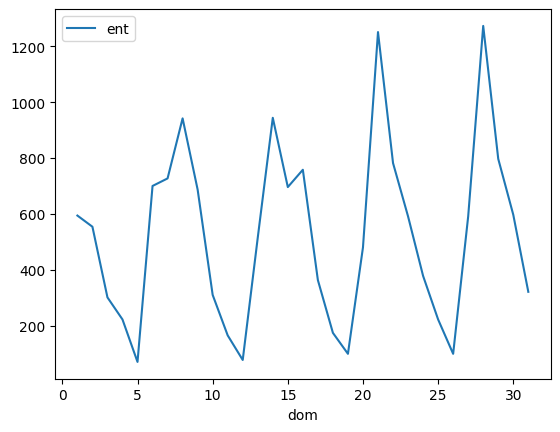

In [12]:
df.plot(x="dom", y="ent")

By default, `DataFrame.plot` produces a line graph. We can specify the type of the graph using the argument of kind.

Find out more about the graph types supported by `DataFrame.plot` can be found in [pandas.pydata documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

The input arguments for different types of graph might be different, the input arguments for each graph type are specified in their respective function in documentation. For example, the input arguments for line graph is found under `pandas.DataFrame.plot.line`; the input arguments for bar graph is found under `pandas.DataFrame.plot.bar`.

Back to the entry data. As we only have the daily total entry for the car park, connecting two adjacent data points with a straight line might give the wrong impression that the entry increases linearly. Therefore we might want to avoid using line graph for this reason.

Alternatively, we could use a vertical bar plot (`kind=bar`).

<ins>Bar Graph</ins>


<Axes: xlabel='dom'>

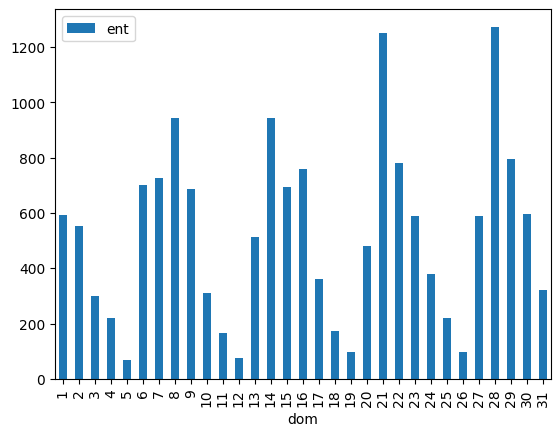

In [13]:
df.plot(x="dom", y="ent", kind="bar")

From the bar graph, the data pattern is a bit clearer compare to the line graph. It seems that there is a regular pattern repeating throughout the month.

From the first glance it seems like the repeating pattern has a 7-day period (1 week). To confirm this, we can restructure the data based on the day of week (`dow`) column to show the information of day of week in the graph.

<ins>Scatter plot</ins>

The graph we will create will help us to view the patterns for each week, and how the pattern changes from the first week till the end of the month. Therefore we need two data columns apart from the entry data, the day of week and the week number.

We first create a column by converting the dow column into numerical data.

In [14]:
def dowtoint(dow):
    return ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'].index(dow)

df['dowasint'] = df['dow'].apply(dowtoint)
print(df)

    dom  dow   ent  dowasint
0     1  Sun   594         0
1     2  Mon   554         1
2     3  Tue   301         2
3     4  Wed   222         3
4     5  Thu    70         4
5     6  Fri   700         5
6     7  Sat   727         6
7     8  Sun   942         0
8     9  Mon   687         1
9    10  Tue   310         2
10   11  Wed   165         3
11   12  Thu    77         4
12   13  Fri   515         5
13   14  Sat   944         6
14   15  Sun   696         0
15   16  Mon   758         1
16   17  Tue   363         2
17   18  Wed   174         3
18   19  Thu    99         4
19   20  Fri   480         5
20   21  Sat  1251         6
21   22  Sun   782         0
22   23  Mon   591         1
23   24  Tue   378         2
24   25  Wed   222         3
25   26  Thu    99         4
26   27  Fri   591         5
27   28  Sat  1273         6
28   29  Sun   797         0
29   30  Mon   597         1
30   31  Tue   321         2


dowtoint function converts the shortforms of the day of week into integers. This function is designed for one single input. In order for the function to be used (a.k.a. applied) on every row, we use .`apply`.

Now we have a column named dowasint to hold the value of day of week as integer.

The next step is to obtain a column to display the week number. In this example we consider the first day of the week being Sunday, therefore one week starts on Sunday and ends on Saturday.

In [15]:
firstdaydow = df.loc[0,'dowasint']

In this example the first day of the month is a Sunday, therefore the first occurrence of each day of week automatically correspond to the first week (week 1).

However, there are times where the first day of the month is not a Sunday. Let's establish a logic to accommodate those situations.

If the first day of the month is Tuesday (2), the first occurrence of Sunday (0) and Monday (1) will be in the second week (week 2). With this logic, we can say that for any day of the week less than the first day of the week (of the month), the first occurrence will be in week 2, otherwise, the first occurrence is in week 1.

In [16]:
for x in range(7):
    startingnumber = 2 if x < firstdaydow else 1
    thisdow = df['dowasint'] == x
    numberofthisdow = thisdow.sum()
    df.loc[thisdow, 'weeknumber'] = range(startingnumber, startingnumber+numberofthisdow)
print(df)

    dom  dow   ent  dowasint  weeknumber
0     1  Sun   594         0         1.0
1     2  Mon   554         1         1.0
2     3  Tue   301         2         1.0
3     4  Wed   222         3         1.0
4     5  Thu    70         4         1.0
5     6  Fri   700         5         1.0
6     7  Sat   727         6         1.0
7     8  Sun   942         0         2.0
8     9  Mon   687         1         2.0
9    10  Tue   310         2         2.0
10   11  Wed   165         3         2.0
11   12  Thu    77         4         2.0
12   13  Fri   515         5         2.0
13   14  Sat   944         6         2.0
14   15  Sun   696         0         3.0
15   16  Mon   758         1         3.0
16   17  Tue   363         2         3.0
17   18  Wed   174         3         3.0
18   19  Thu    99         4         3.0
19   20  Fri   480         5         3.0
20   21  Sat  1251         6         3.0
21   22  Sun   782         0         4.0
22   23  Mon   591         1         4.0
23   24  Tue   3

The best way to visualise this would be to use a heatmap, however, heatmap is not directly provided by pandas as a graph type, we can use the scatter plot as an alternative to provide us similar visualisation effect.

<Axes: xlabel='Week number', ylabel='Day of week'>

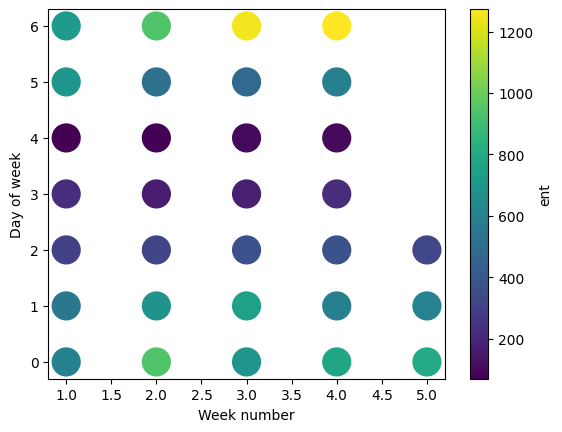

In [17]:
df.plot(
    x='weeknumber', y='dowasint', c='ent', s=400, 
    kind='scatter', colormap='viridis', 
    xlabel='Week number', ylabel='Day of week')

As the plotting functions provided by pandas use the functions from matplotlib, the graph visualisation library for Python, the plotted graph is identical to how we would plot the graph with matplotlib. Therefore we can refer to the matplotlib documentation to perform modification on our graph.

For example, we can change the label of the ticks on the y axis to be Sun, Mon, Tue, etc. instead of 0, 1, 2.

[Text(0, 0, 'Sun'),
 Text(0, 1, 'Mon'),
 Text(0, 2, 'Tue'),
 Text(0, 3, 'Wed'),
 Text(0, 4, 'Thu'),
 Text(0, 5, 'Fri'),
 Text(0, 6, 'Sat')]

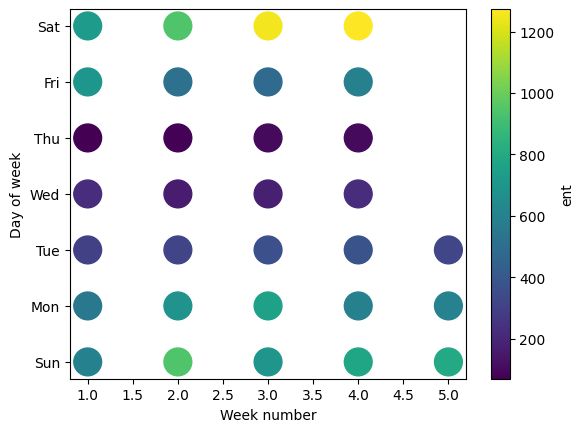

In [18]:
ax = df.plot(x='weeknumber', y='dowasint', c='ent', s=400, kind='scatter', colormap='viridis', xlabel='Week number', ylabel='Day of week')
ax.set_yticks(range(7))
ax.set_yticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

From the scatter plot, we can see that the pattern repeats weekly, whereby Thursday has the lowest entry and Saturday has the highest following by Sunday.

We can also further confirm this by plotting a bar graph with the data of the same day of week being grouped together.

<ins>Stacked bar graph</ins>

In [19]:
totalweeknumber = df['weeknumber'].astype('int').max()
weekgroups = {}
for x in range(totalweeknumber):
    thisweek = [None, None, None, None, None, None, None]
    thisdow = df.loc[df['weeknumber']==x+1, 'dowasint'].to_list()
    thisent = df.loc[df['weeknumber']==x+1, 'ent'].to_list()
    for dow, ent in zip(thisdow, thisent):
        thisweek[dow] = ent
    weekgroups[f'week{x+1}'] = thisweek
print(weekgroups)

{'week1': [594, 554, 301, 222, 70, 700, 727], 'week2': [942, 687, 310, 165, 77, 515, 944], 'week3': [696, 758, 363, 174, 99, 480, 1251], 'week4': [782, 591, 378, 222, 99, 591, 1273], 'week5': [797, 597, 321, None, None, None, None]}


This code block extracts the data for each week into the dictionary object. The data for each week is arranged such that it starts with Sunday and ends on Saturday. If a day of the week is not present in that week, it will be filled with None.

[Text(0, 0, 'Sun'),
 Text(1, 0, 'Mon'),
 Text(2, 0, 'Tue'),
 Text(3, 0, 'Wed'),
 Text(4, 0, 'Thu'),
 Text(5, 0, 'Fri'),
 Text(6, 0, 'Sat')]

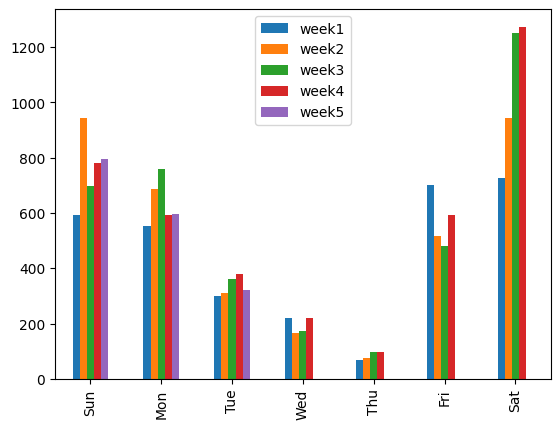

In [20]:
weekdf = pd.DataFrame(weekgroups)
ax = weekdf.plot.bar()
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

From the graph we can observe that the pattern for every week is consistent, with high entry number at the beginning and end of the week, and low entry number in the middle of the week.

For each day of week, the number of entry for different weeks are similar with variations. We can use boxplot to visualise the variations.

<ins>Box plot</ins>

We want to visualise the variations of ent by grouping the same dow into same group.

Text(0.5, 1.0, '')

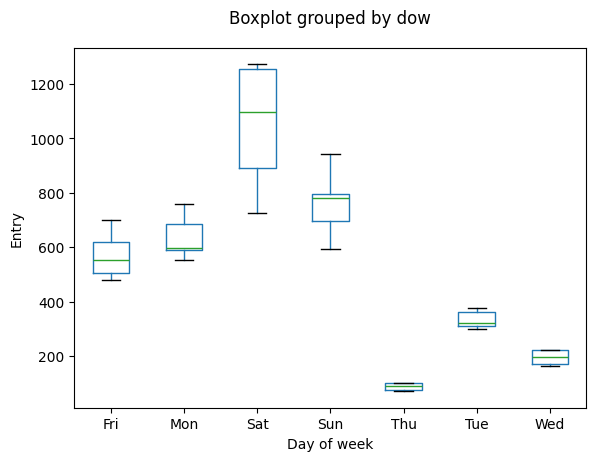

In [21]:
ax = df.boxplot(column=["ent"], by="dow", grid=False)
ax.set_xlabel("Day of week")
ax.set_ylabel("Entry")
ax.set_title("")

Note that the x axis is arranged in alphabetical order. From the boxplot, it can be seen that the variation on Saturday is higher than other days.

Always keep in mind that we should always make the visualisation decision based on the purpose of visualisation.

## 3.5.1 Visualisation in workspace
The previous section demonstrated the visualisation functions provided by `pandas` using the Jupyter notebook. Jupyter notebook is useful in providing step by step demonstration but not for creating a software system. This section will provide the method to visualise data in a script and save it as an external file.

If we are visualising data using a script and/or using the terminal, when we issue the command:
~~~
df['a'].plot()
~~~

(assuming `df` is a `DataFrame` with column `a`), we will not see the graph immediately. This is because the command creates a graphical object, but the object is not being displayed. As the visualisation of `pandas` uses `matplotlib` under the hood, the command to display the created graphical object is provided by `matplotlib`. 

<ins>Display of the graphical object</ins>

First we need to import the `pyplot` module of `matplotlib` library.
```
import matplotlib.pyplot as plt
```

>Conventionally `matplotlib.pyplot` is imported with the alias of plt but this is just conventional and not a rule. We may import it to be `mplt` if we want, or other name.

The command to show a created graphical object is `plt.show()`. After the command, the graph will be displayed and the program will halt until the graph is closed. This behaviour is called blocking, where the execution of further code is paused (or blocked). This behaviour is useful especially when the display of the graph is the last page of a script. If no blocking is implemented, the graph will be displayed, and the code will continue to the end of the script and therefore exiting the program, which closes the graph. This will prevent us from reading the graph.

Unlike in `Jupyter` notebook where the graph is displayed beneath the code, in a `Python` script or terminal, the graph will be displayed in a pop-up window with control buttons to save and manipulate the graph.

<ins>Saving the graph</ins>

`matplotlib` has also provided the command to save the graphical object as an image. Typically we would save them as `.png` files but other common image types are supported. The command to save the graph is

```
plt.savefig("imagename.png")
```

The file type of the saved image is automatically inferred from the filename provided to the .savefig command. The image will be saved in the same folder as your script. 

The `.savefig` command does not rely on `.show` command to work. Therefore if we are only interested in saving the graph and does not require the display of the graph when executing the script, we can omit the `.show` command.

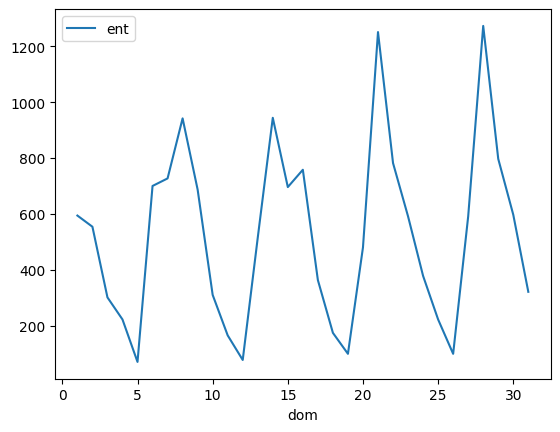

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../datasets/carparkentry.csv")
df.plot(x="dom", y="ent")
plt.savefig("../figures/entryvsdayofmonth-ipynb.png")

## 3.5.2 Visualisation using matplotlib

To use `matplotlib`, typically we import the `pyplot` module of the `matplotlib` library to perform the plotting. Conventionally we use plt as the alias for `matplotlib.pyplot`. That is why in most of the tutorials or codes using the visualisation functions from `matplotlib`, the authors use `plt`.

~~~
import matplotlib.pyplot as plt
~~~

The types of plots provided in `matplotlib` are listed on the [official documentation](https://matplotlib.org/stable/plot_types/index.html). For this section, we will go through a couple of the plot types and some methods to manipulate the visual of the graph.

<ins>Line graph</ins>

Line graph can be achieved with the function `.plot`. We will first plot the line graph with  
- x-axis: day of month, dom column
- y-axis: car entry, ent

How to run in terminal: `python your-file-name.py`

<ins>Labels for x and y</ins>

matplotlib.pyplot provides multiple functions to manipulate the visuals of the graph. For instance, we can use 
- `.xlabel` and `.ylabel` to add or modify the labels of the x and y axis.
- `.plt.title()` add a title to the graph
- `plt.plot` to replace the old graph with new graph
- `plt.gca()` returns the handle of the current axis
```
plt.xlabel("Day of Month")
plt.ylabel("Entry")
plt.title("Car entry for different day of month")
```

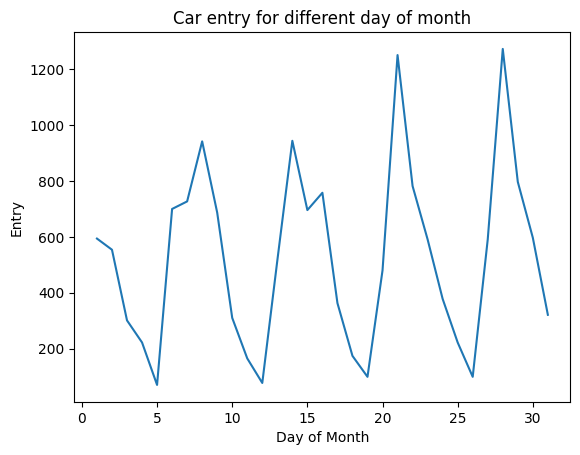

In [26]:
import matplotlib.pyplot as plt

plt.xlabel("Day of Month")
plt.ylabel("Entry")
plt.title("Car entry for different day of month")
plt.plot(df['dom'], df['ent'])
ax = plt.gca()

`ax` now is the axis object. To plot the a different graph on the same axis, we need to use the method of the axis object. To plot another line graph on `ax`, we need to use a`x.plot(x,y)`.

For now, we create a step graph using the same data (`dom` and `ent`). A step graph can be created using `.step` function. 

To add legends, we use `.legend()`.

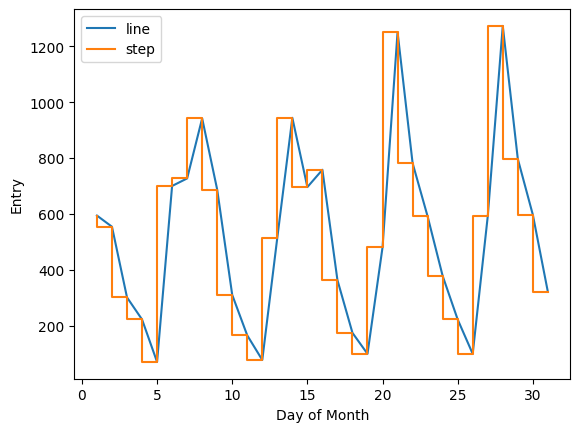

In [28]:
import matplotlib.pyplot as plt

plt.plot(df['dom'], df['ent'], label='line')

ax = plt.gca()
ax.step(df['dom'], df['ent'], label='step')
plt.xlabel("Day of Month")
plt.ylabel("Entry")
plt.legend()

plt.savefig("../figures/entryvsdayofmonth-step.png")

<ins>Subplots</ins>

There are times when we want to display multiple axes on one figure. To do so, we are creating `subplots`. We can use `plt.subplots` to create a figure with the specified number of subplots. Calling the function `plt.subplots()` without any input argument creates a figure with one axis, which is identical to what we have done earlier. The function returns two values, the first is the handle to the figure, and the second is the list of the handles to the subplot axes.

The following lines of code are provided in `main_subp.py`, which is the file we will be working with while going through the section of subplots.

> `fig.savefig` behaves identically as plt.savefig with one exception. `plt.savefig` saves the current figure, and `fig.savefig` saves the `figure fig`.

Now, going back to the purpose of introducing subplots. We want multiple axes on the same figure. The first two input arguments of the function `plt.subplots(nrows=1,ncols=1)` specify the number of rows and columns for the subplots. For example if we want to create a figure with two graphs side-by-side as follows, we will have `nrows = 1` and `ncols = 2`. 

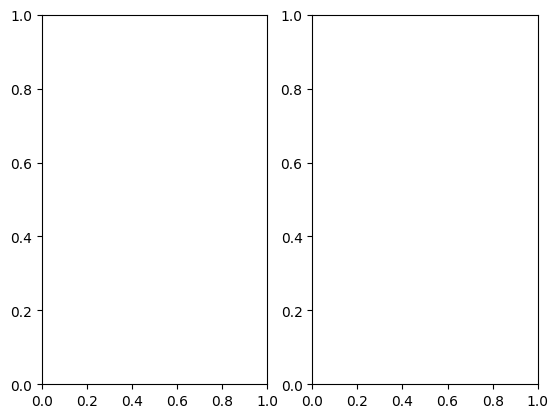

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/carparkentry.csv")
fig, ax = plt.subplots(1,2)
plt.show()

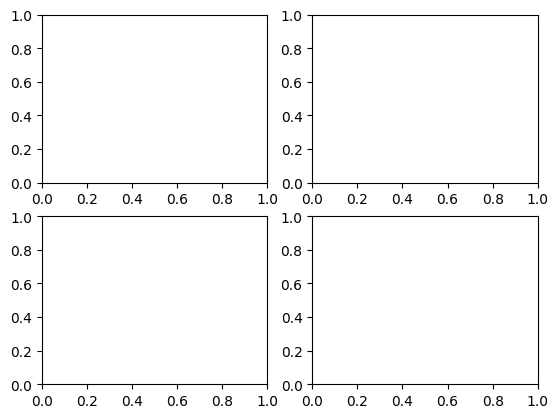

In [ ]:
# By using unpacking concept
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
plt.show()

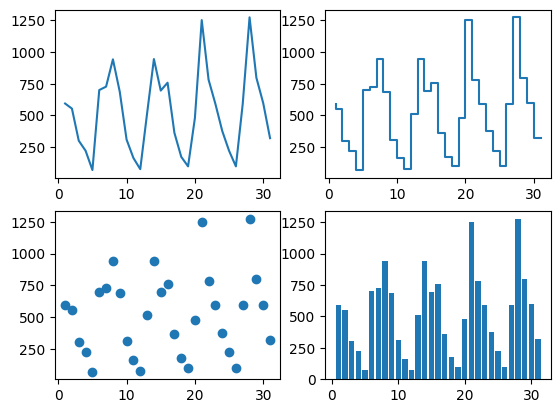

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot(df['dom'],df['ent'])
axs[0,1].step(df['dom'],df['ent'])
axs[1,0].scatter(df['dom'],df['ent'])
axs[1,1].bar(df['dom'],df['ent'])
plt.show()

<ins>Complex layout</ins>

We can also create complex layout with subplots. 

If we split this layout into grids, we will have the same two-by-two layout as previous. So we can still use the plt.subplots(2,2) function call to create the figure.

>We can use _ to suppress a returned value that's not needed. In this case, as we want to create an axis spanning two columns at the bottom of the figure, we don't need ax3 and ax4.

`ax1` and `ax2` refer to the top two axes. To create the bottom axis that spans two columns, we need to use `fig.add_subplot(...)`. Take note that it's `add_subplot` and not `add_subplots` as we are creating one axis and not multiple axes.

The function `fig.add_subplot(nrows, ncols, index)` retrieve or create new subplot. `nrows` and `ncols` are the number of rows and columns of the whole figure. So in this case both of them are 2. The index indicates the position(s) of which we want to create the subplot. The index counts from left to right, top to bottom, with 1 for the top left axis. 

index can be a single value, if the subplot is occupying one position only. If the subplot spans should across multiple positions, we can use a list with two values, whereby the first value is the stating position and the second value is the ending position.

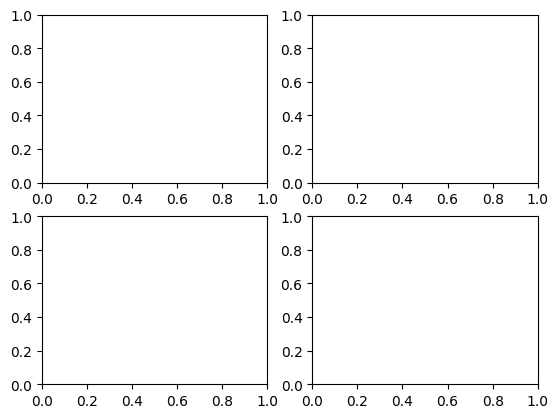

In [ ]:
fig, ( (ax1, ax2), _ ) = plt.subplots(2,2)
plt.show()

Therefore, the bottom axis that spans two columns starts from position 3 and ends at position 4, i.e. `index = (3,4)`. To create that axis, we will use

In [ ]:
ax = fig.add_subplot(2, 2, (3,4))
plt.show()

`ax` is now the handle of the bottom two-column axis, and we can use ax to do further plotting.

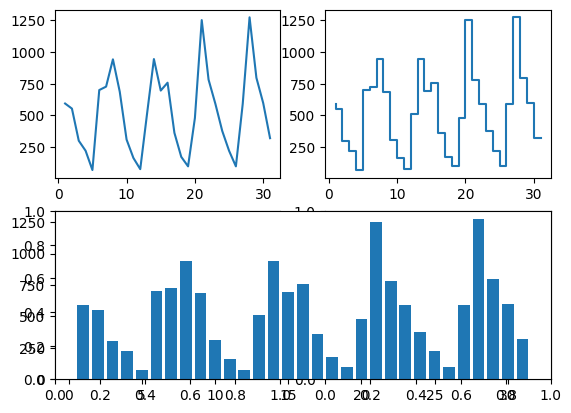

In [ ]:
fig, ( (ax1, ax2), _ ) = plt.subplots(2,2)
ax1.plot(df['dom'],df['ent'])
ax2.step(df['dom'],df['ent'])

ax3 = fig.add_subplot(2, 2, (3,4))
ax3.bar(df['dom'],df['ent'])

plt.show()

When we inspect the figure, we will notice that there are axes behind the bottom subplot as shown. This is because when we first called `plt.subplots(2,2)`, the function call creates 4 axes, including the two at the bottom row. Therefore the new axis created using `fig.add_subplot(2,2,(3,4))` just overlap on the original two axes. 

To solve this, we can use `ax.set_axis_off()` to hide the x and y axes. So the code would become this:

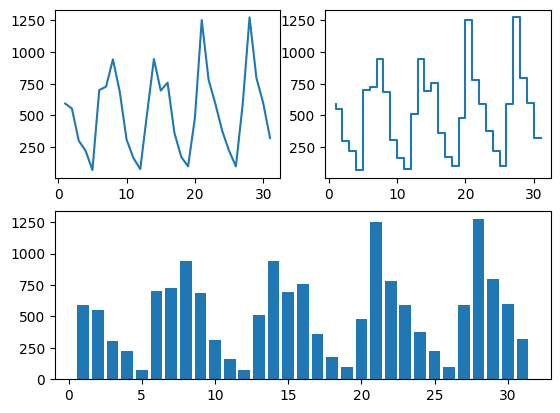

In [ ]:
fig, ( (ax1, ax2), (ax3, ax4) ) = plt.subplots(2,2)
ax1.plot(df['dom'],df['ent'])
ax2.step(df['dom'],df['ent'])

ax3.set_axis_off()
ax4.set_axis_off()

ax5 = fig.add_subplot(2, 2, (3,4))
ax5.bar(df['dom'],df['ent'])

plt.show()

Sometimes we want to create a more complex layout and using `.set_axis_off()` is tedious for the scenario, instead of using `plt.subplots()` to create the subplots layout, we can create an empty figure, and just use `.add_subplot()` to add subplots to the figure.

<ins>Empty figure to add subplots on</ins>

An empty figure can be created using `plt.figure()`. This function call returns the handle of a new figure. We can also provide keyword input arguments to define the parameters of the figure. The valid arguments can be found at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html. We won't go into details on these for now but focus on creating subplots.

As we have three subplots on the figure, we need to call `fig.add_subplot()` three times, each for one subplot. The top left axis is created using `fig.add_subplot(2,2,1)`, because the axis is the first subplot of a two-by-two grid. The top right axis is created using `fig.add_subplot(2,2,2)` because the axis is the second subplot of a two-by-two grid.

The bottom axis can be created with different input arguments. 

- Method 1: The axis starts from third subplot to fourth subplot of a two-by-two grid, i.e. fig.add_subplot`(2,2,(3,4))`.

- Method 2: The axis is the second subplot of a two-by-one grid (two rows, one column), i.e. `fig.add_subplot(2,1,2)`.

Both methods create identical layout. With this approach of creating an empty figure and populate the subplots one by one removes the concern of having to remember if there is any axis that need to be hidden.

## 3.5.3 Additional notes on visualisation
In this lesson we have gone through some of the visualisation functions provided in the `pandas`. It is also worth noting that the pandas library focuses on providing methods to manipulate the data. Therefore the visualisation functions provided are limited. 

On the other hand, `matplotlib` is a visualisation library. Thus it provides powerful visualisation functions and allows complex manipulation to the looks of the visualisation. In fact, we can use the functions in matplotlib directly to visualise the data in a `DataFrame` or `Series`. 

Alternative visualisation libraries for Python worth mentioning also include `seaborn` and `plotly`. 

`seaborn` is another library based on `matplotlib`. The main differences between `seaborn` and `matplotlib` is (a) the default look of a seaborn graph is generally more modern than the default look of a `matplotlib` graph, and (b) `seaborn` provides some additional graph types that can be useful in some use cases.

`plotly` uses the web technology, namely `Javascript`, to render the actual display of the graph. Therefore it has to be written to `html` file or using a web backend to display the graph in the browser.